<a href="https://www.kaggle.com/code/pongsakornonnim/video-game-sales-analysis?scriptVersionId=127478659" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Author's Note:**

Hi, my name is Pongsakorn Onnim. I have a bachelor's degree in environmental engineering and have been pursuing a career in data science. I am passionate about using data to drive insights and decision-making. This analysis is a demonstration of my analytical and data visualization skills, and I hope it showcases my potential as a data analyst.

If you would like to learn more about my experience and qualifications, please feel free to reach out to me at pongsakorn.onnim@gmail.com or connect with me on LinkedIn at [LinkedIn Profile URL](https://www.linkedin.com/in/pongsakorn-onnim-160b52202/)

# Introduction

The video game industry is a large and rapidly growing industry, driven by advances in technology that make gaming more accessible. In this project, I analyzed video game sales from 1980 to 2016, focusing on sales, platforms, genres, and regions. The goal was to identify patterns and insights to understand which games are successful, which platforms are popular, and which producers dominate the market. Additionally, I analyzed how these variables differ across regions, including North America, Europe, Japan, and the rest of the world. The insights gained from this analysis provide a better understanding of which games succeed in this industry.

# Data Validation

The dataset contians **16598 rows and 11 columns** before cleaning and validation. Below is the detail of the variables in this dataset.

- **Rank**: Ranking of overall sales. No missing values (the same game but different platforms are count as different values)
- **Name**:  The games name. No missing values.
- **Platform**: Platform of the games release (i.e. PC,PS4, etc.). No missing values.
- **Year**: Year of the game's release. 271 missing values. The missing values were removed in the cleaning process.
- **Genre**: Genre of the game. No missing values.
- **Publisher**: Publisher of the game. 58 missing values. The missing values were removed in the cleaning process.
- **NA_Sales**: Sales in North America (in millions). No missing values.
- **EU_Sales**: Sales in Europe (in millions). No missing values.
- **JP_Sales**: Sales in Japan (in millions). No missing values.
- **Other_SaleS**: Sales in the rest of the world (in millions). No missing values.
- **Global_Sales**: Total worldwide sales. No missing values.

After the data validation, the dataset contains **16323 rows and 11 columns** without missing values.

In [1]:
# Import necessary modules
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [3]:
# Check the data types
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
# Inspect the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
name_game = df.value_counts("Name")
len(name_game)

11493

In [6]:
# Examine the descriptive statistic of the dataset
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
# Drop duplicated rows
df.drop_duplicates()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
# Count number of missing values in each column
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
# Examine the distribution of game released in each year
Year = df["Year"].value_counts().sort_index()
print(Year)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Year, dtype: int64


It looks like the data is incomplete after 2016. The number of games released drop from 344 games in 2016 to only 3 games in 2017 and there is no data on 2018 and 2019. While 2020 has only 1 game released. 

So, I will remove rows with year 2017, 2020 and rows with missing released year.

In [10]:
# Remove games with missing released year and year in 2017 and 2020
df = df[~df["Year"].isin([2017.0, 2020.0])]
df = df[~df["Year"].isnull()]

# Replace missing values in 'Publisher' column with 'unknown'
df["Publisher"].fillna("unknown",inplace = True)

In [11]:
# Check for missing values again after cleaning data
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
# Change year's column format from float to integer
df["Year"] = df["Year"].astype(int)
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [13]:
# Inspect the dataset information again after cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16323 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16323 non-null  int64  
 1   Name          16323 non-null  object 
 2   Platform      16323 non-null  object 
 3   Year          16323 non-null  int64  
 4   Genre         16323 non-null  object 
 5   Publisher     16323 non-null  object 
 6   NA_Sales      16323 non-null  float64
 7   EU_Sales      16323 non-null  float64
 8   JP_Sales      16323 non-null  float64
 9   Other_Sales   16323 non-null  float64
 10  Global_Sales  16323 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [14]:
# Examine the descriptive statistic of the dataset after cleaning
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
mean,8291.651167,2006.403664,0.265463,0.147591,0.078677,0.048336,0.540343
std,4792.155748,5.826954,0.821684,0.508823,0.311593,0.189907,1.565906
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4135.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8294.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Exploratory Data Analysis

After cleaning and validating the data, the next step in our analysis is to perform exploratory data analysis (EDA) to gain a better understanding of the dataset. EDA is an essential process in data analysis that involves using statistical and visualization techniques to summarize and explore the data.

In this section, we will analyze various aspects of the video game sales dataset, including sales by region, platform, genre, and year. We will explore the distribution of these variables, identify any trends or patterns, and investigate relationships between them. The insights gained from this analysis will provide us with a better understanding of the video game industry and the factors that influence game sales. We will use a variety of visualization techniques, including histrogram, bar charts, box plots, and heatmaps, to illustrate the findings from our analysis.

# Trends in Game Releases Over Time

The number of game releases has shown an upward trend since 1994, with a peak around 2008-2010. However, there was a significant drop in the number of game releases during 2012-2015, with only half of the number of releases compared to the peak period. After 2015, the number of game releases started to increase again.

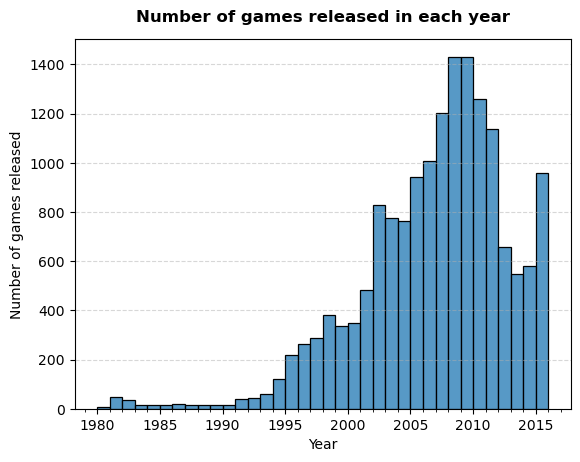

In [15]:
# Create histogram plot of number of games released each year
sns.histplot(data=df, x="Year", binwidth=1)

# Set x-label, y-label, and plot title
plt.xlabel('Year')
plt.ylabel('Number of games released')
plt.title('Number of games released in each year',y=1.025, fontsize=12, fontweight="bold")

# Set minor x-axis ticks
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))

# Add gridlines on the y-axis with dashed style, z-order 0, and alpha 0.5
plt.grid(axis='y', linestyle='--', zorder=0, alpha=0.5)

# Show the plot
plt.show()

# The distribution of game sales worldwide



The box plot below shows the distribution of worldwide game sales. The majority of the sales fall within the range of 0.06 million to 0.48 million, with a few games having sales between 20-40 million. There are also a few games with exceptionally high sales, with one game having a sale of 82.74 million.

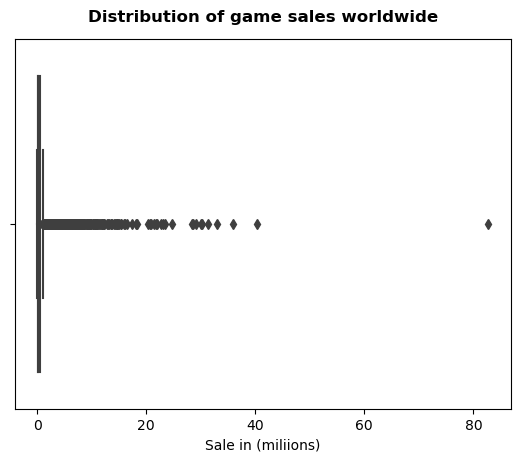

The 25 percentile of Global_Sales = 0.06 million
The 75 percentile of Global_Sales = 0.48 million
The most profitable game sales = 82.74 million


In [16]:
# Create a boxplot to show the distribution of global game sales
sns.boxplot(data=df, x="Global_Sales")

# Set x-axis label to "Sale in (millions)" and remove y-axis label
plt.xlabel("Sale in (miliions)")
plt.ylabel("")

# Set the plot title with y-offset 1.025, font size 12, and bold font weight
plt.title('Distribution of game sales worldwide',y=1.025, fontsize=12, fontweight="bold")

# Display the plot
plt.show()

# Calculate the 25th and 75th percentile of the 'Global_Sales' column
global_sales_25th_quartile = df['Global_Sales'].quantile(0.25)
global_sales_75th_quartile = df['Global_Sales'].quantile(0.75)
print("The 25 percentile of Global_Sales = " + str(global_sales_25th_quartile) + " million")
print("The 75 percentile of Global_Sales = " + str(global_sales_75th_quartile) + " million")
print("The most profitable game sales = " + str(df['Global_Sales'].max()) + " million") 

In [17]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
mean,8291.651167,2006.403664,0.265463,0.147591,0.078677,0.048336,0.540343
std,4792.155748,5.826954,0.821684,0.508823,0.311593,0.189907,1.565906
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4135.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8294.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## **Distribution of game sales by region**

The median sales values for North America, Europe, Japan, and Other regions are 0.08M, 0.02M, 0.00M, and 0.01M, respectively. While most of the games in the dataset have sales under 10 million, there are a few outliers that have exceeded this amount.

It's important to note that a median sales value of 0.00M in Japan indicates that half of the games in the dataset had no recorded sales. However, this doesn't necessarily mean that these games did not sell at all. It's possible that some sales data was not included in the dataset.

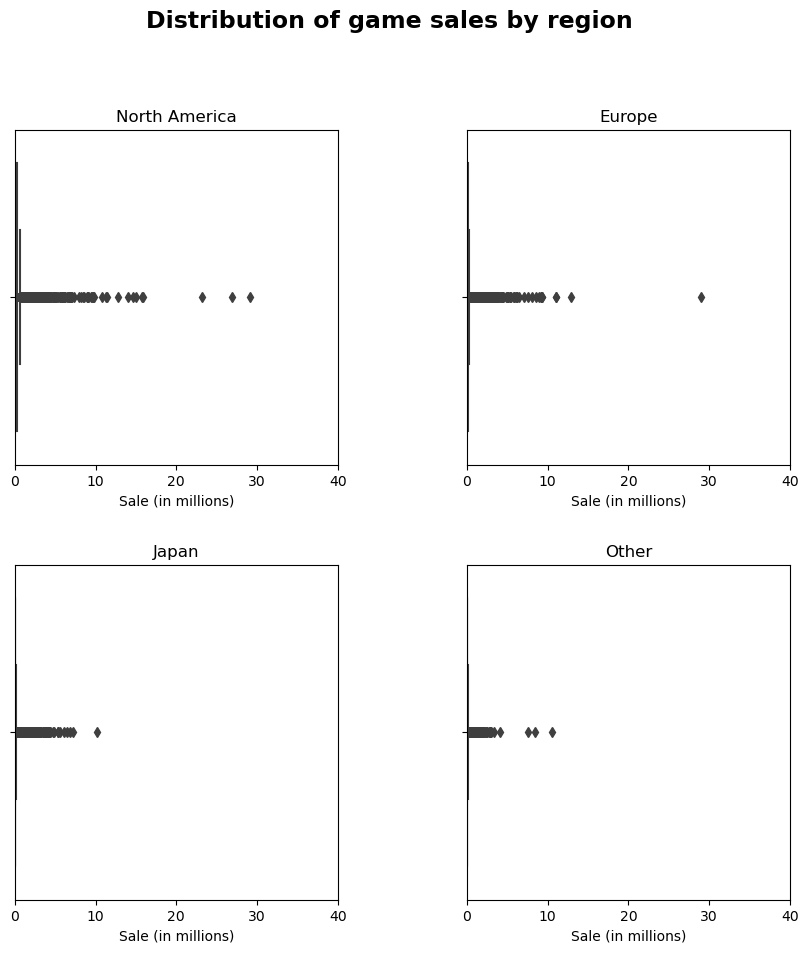

In [18]:
# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10,10))

# Create boxplots
sns.boxplot(ax=axes[0,0], data=df, x="NA_Sales")
sns.boxplot(ax=axes[0,1], data=df, x="EU_Sales")
sns.boxplot(ax=axes[1,0], data=df, x="JP_Sales")
sns.boxplot(ax=axes[1,1], data=df, x="Other_Sales")

# Set x-limit for each subplot
for ax in axes.flatten():
    ax.set_xlim(0,40)

# Set x-label, y-label, and title for each subplot
axes[0,0].set_title("North America")
axes[0,0].set_xlabel("Sale (in millions)")
axes[0,0].set_ylabel("")

axes[0,1].set_title("Europe")
axes[0,1].set_xlabel("Sale (in millions)")
axes[0,1].set_ylabel("")

axes[1,0].set_title("Japan")
axes[1,0].set_xlabel("Sale (in millions)")
axes[1,0].set_ylabel("")

axes[1,1].set_title("Other")
axes[1,1].set_xlabel("Sale (in millions)")
axes[1,1].set_ylabel("")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.4)

# Add title to entire figure
fig.suptitle("Distribution of game sales by region", y=1, fontsize=17, fontweight="bold")

# Show plot
plt.show()


## **Correlation Heatmap**

We observed positive correlations between North America sales, Europe sales, Other regions sales, and Japan sales, indicating that there is a tendency for sales in these regions to move in the same direction. However, it is important to note that strong sales in one region do not necessarily guarantee strong sales in other regions, as there are many factors that can influence a game's success in different markets.

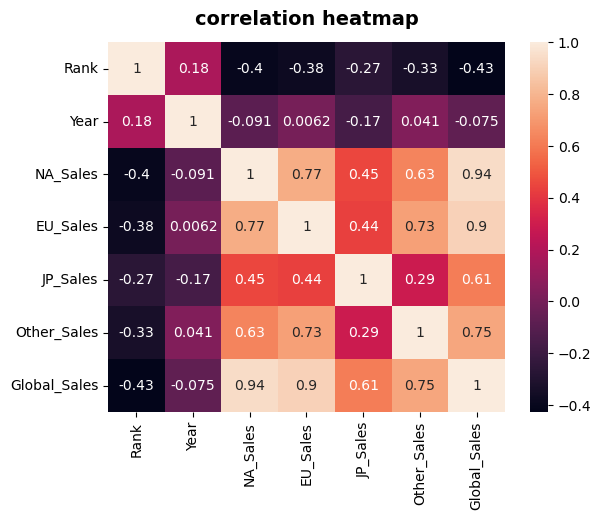

In [19]:
# Display the data types of each column in the DataFrame
df.dtypes

# Create a heatmap to visualize the correlation between numerical variables in the DataFrame
# 'annot=True' displays the correlation coefficient values in each cell of the heatmap
sns.heatmap(df.corr(), annot=True)

# Add a title to the heatmap
plt.title("correlation heatmap", y=1.025, fontsize=14, fontweight="bold")

# Display the heatmap
plt.show()


## **Percentages of sales for each region**

Nearly half of all global video game sales are attributed to North America with 49.2%, followed by Europe with 27.3%, Japan with 14.6%, and other regions with 9.0%.

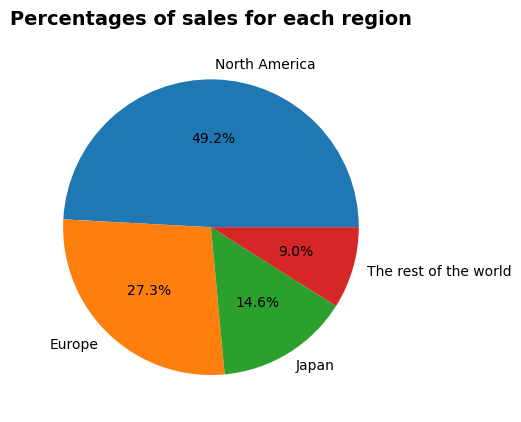

In [20]:
# Calculate the percentage of global sales for each region
overall_sales_NA = df["NA_Sales"].sum()/df["Global_Sales"].sum() * 100
overall_sales_EU = df["EU_Sales"].sum()/df["Global_Sales"].sum() * 100
overall_sales_JP = df["JP_Sales"].sum()/df["Global_Sales"].sum() * 100
overall_sales_Other = df["Other_Sales"].sum()/df["Global_Sales"].sum() * 100

# Define the labels and values for the pie chart
labels = ['North America', 'Europe', 'Japan', 'The rest of the world']
values = [overall_sales_NA, overall_sales_EU, overall_sales_JP, overall_sales_Other]

# Create the pie chart with labels and percentage formatting
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the chart
plt.title("Percentages of sales for each region", y=1.025, fontsize=14, fontweight="bold")

# Show the plot
plt.show()


## **Global game sales overtime**

From 1980 to 1994, video game sales remained below 100 million and did not show significant changes. However, starting from 1995, sales began to increase and reached a peak of almost 700 million in 2008. Following this peak, sales began to decline and were below 100 million by 2016.

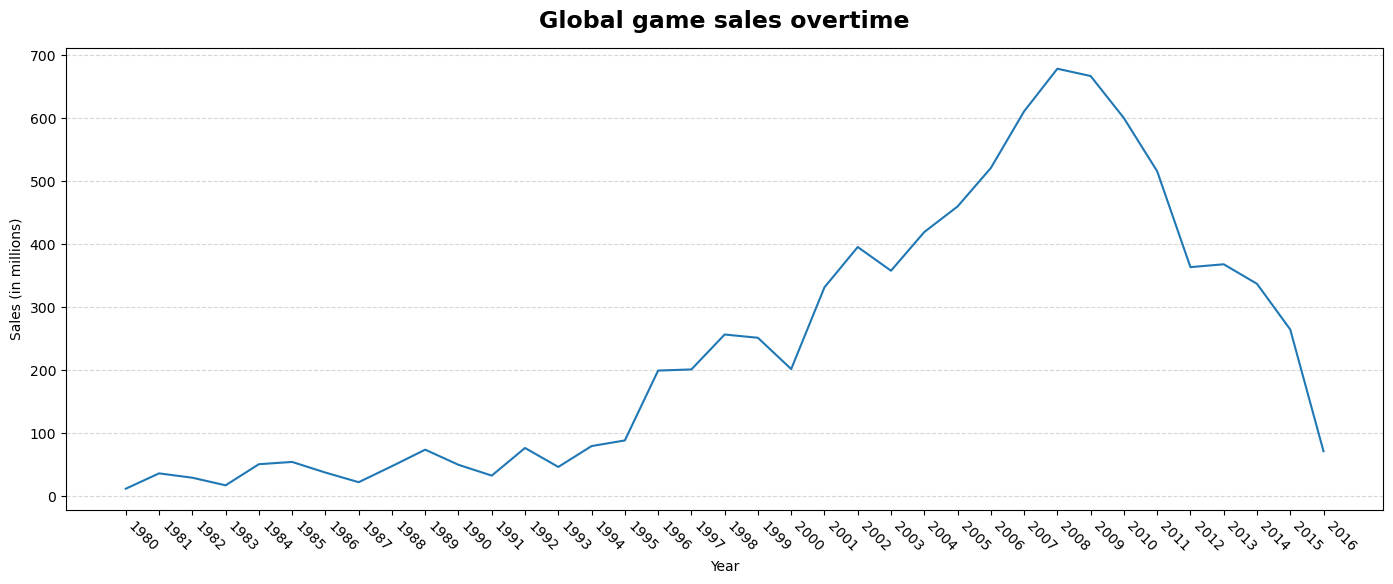

In [21]:
# Group data by year and calculate total global sales for each year
global_sale_each_year = df.groupby("Year")["Global_Sales"].sum()

# Create figure with size 17x6 inches
plt.figure(figsize=(17, 6))

# Create line plot with x-axis as year and y-axis as global sales
sns.lineplot(data=global_sale_each_year)

# Set the plot title, y-axis label, and x-axis label
plt.title("Global game sales overtime", y=1.025, fontsize=17, fontweight="bold")
plt.ylabel("Sales (in millions)")
plt.grid(axis='y', linestyle='--', zorder=0, alpha=0.5)

# Get the current axis object
ax = plt.gca()

# Set x-tick labels and rotation angle
ax.set_xticks(global_sale_each_year.index)
ax.set_xticklabels(global_sale_each_year.index, rotation=315, ha='left', fontsize=10)

# Remove minor x-tick labels
ax.tick_params(axis='x', which='minor', bottom=False)

# Set minor x-tick locator to automatically determine tick locations
ax.xaxis.set_minor_locator(AutoMinorLocator())

# Display the plot
plt.show()


## **Game sales in each region overtime**

The game sales data is divided into four regions: North America, Europe, Japan, and Other regions. The sales trends for these regions are similar over time. North America appears to have the highest sales figures, followed by Europe, and then Japan and Other regions, with some overlap between Japan and Other regions from 2004 to 2010.

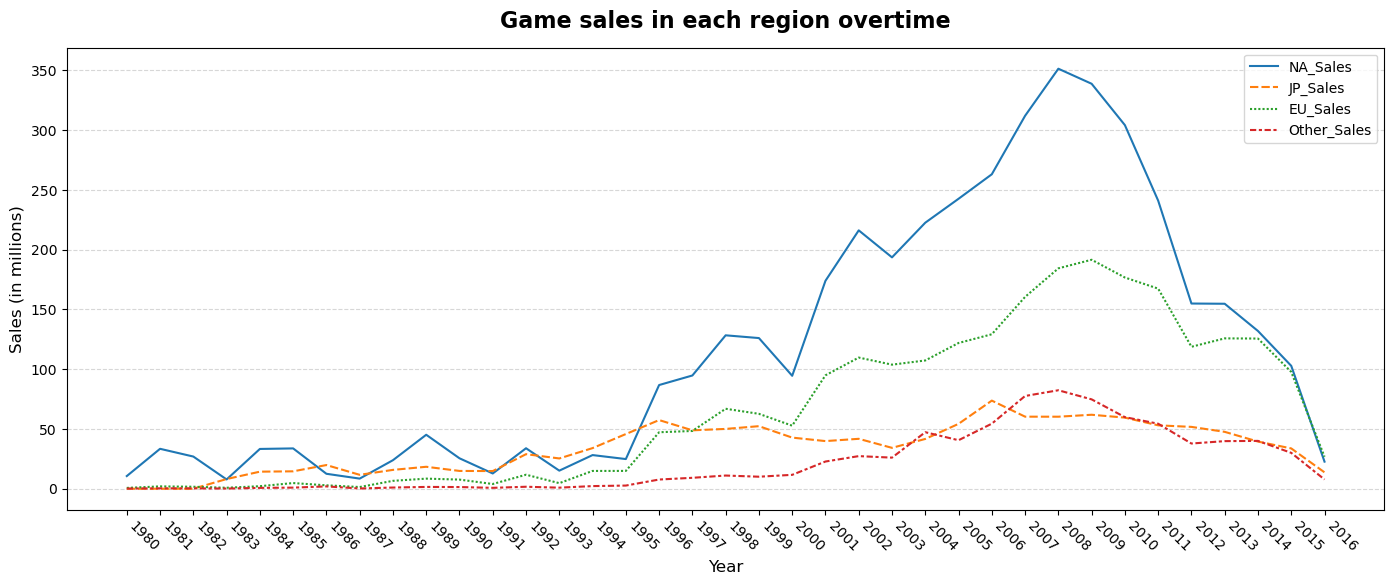

In [22]:
# group sales by year and region
sales_year_region = df.groupby('Year')[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']].sum()

# create figure with specified size
plt.figure(figsize=(17, 6))

# plot line chart for each region
sns.lineplot(data=sales_year_region)

# add title and axis labels
plt.title("Game sales in each region overtime", y=1.025, fontsize=16, fontweight="bold")
plt.ylabel("Sales (in millions)", fontsize=12)
plt.xlabel("Year", fontsize=12)

# add gridlines
plt.grid(axis='y', linestyle='--', zorder=0, alpha=0.5)

# customize x-axis
ax = plt.gca()
ax.set_xticks(sales_year_region.index)
ax.set_xticklabels(sales_year_region.index, rotation=315, ha='left', fontsize=10)
ax.tick_params(axis='x', which='minor', bottom=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())

# display the plot
plt.show()

## **Year-Over-Year game sales growth worldwide**

There were several years with sales growth of over 50% year on year. It's interesting to note that this growth started as early as 1981, with growth rates around 200%. However, the following year, sales growth swung back to negative. This pattern repeated several times from 1981 to 1993.

After 2002, sales growth remained more steady at around 15%, with negative growth seen after 2010, and the most negative growth occurring in 2016.

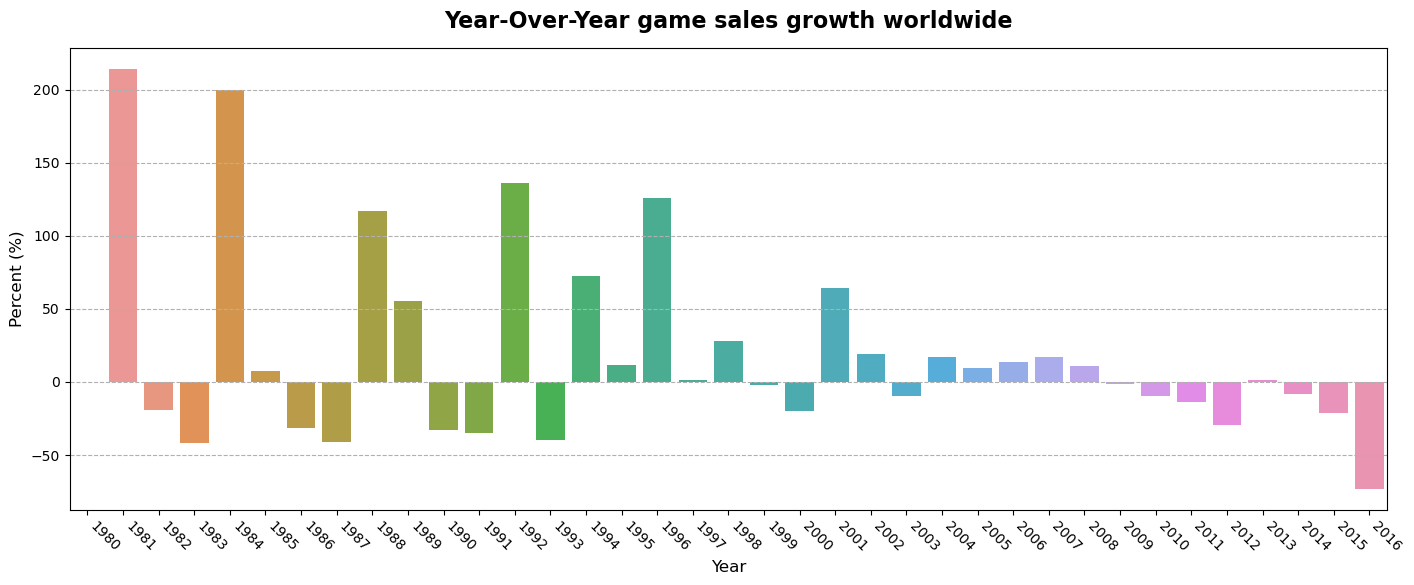

In [23]:
# Compute percentage change in global sales year over year
Growth = df.groupby("Year")["Global_Sales"].sum().pct_change()*100

# Create figure with size 17x6 inches
plt.figure(figsize=(17, 6))

# Create bar plot with x-axis as year and y-axis as growth rate
sns.barplot(x=Growth.index, y=Growth.values, data=df)

# Get the current axis object
ax = plt.gca()

# Set the x-tick labels to left align and rotated 320 degrees
ax.set_xticklabels(Growth.index, ha='left')
ax.tick_params(axis='x', rotation=320)

# Rotate the x-axis labels 315 degrees
plt.xticks(rotation=315)

# Set the plot title, y-axis label, and x-axis label
plt.title("Year-Over-Year game sales growth worldwide", y=1.025, fontsize=16, fontweight="bold")
plt.ylabel("Percent (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)

# Add gridlines on the y-axis with dashed style, z-order 0, and alpha 1
plt.grid(axis='y', linestyle='--', zorder=0, alpha=1)

# Display the plot
plt.show()

## **What are top 10 ranking of game sales worldwide?**

When looking at the top 10 ranking of game sales worldwide, it's clear that Wii Sports is the most popular game, with overall sales more than two times higher than the second place game, Super Mario Bros. This suggests that many people are interested in games that provide a health benefit or allow them to be physically active, such as sports games.

In [24]:
# Top ten game ranking in the dataset
df.sort_values("Rank").head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


It is important to note that the "rank" column in the dataset splits the same game with different platforms into separate entries. This means that to get a more complete picture of a game's overall success, we need to combine the global sales values for each game across all platforms and compare their overall profitability. For the purposes of our analysis, we will therefore focus on the global sales values instead of the game's ranking in the dataset. This will enable us to provide a more accurate assessment of each game's overall popularity and success.

## **The 20 most profitable games worldwide**

Looking at the 20 most profitable games worldwide, it's clear that Wii Sports is the top game, followed by Grand Theft Auto V and Super Mario Bros. These three games stand out from the rest in terms of their profitability and success, with a significant difference in profits compared to the other games on the list.

It's worth noting that the games on this chart are all very popular and well-known, and most gamers will be familiar with them or have seen them before. 

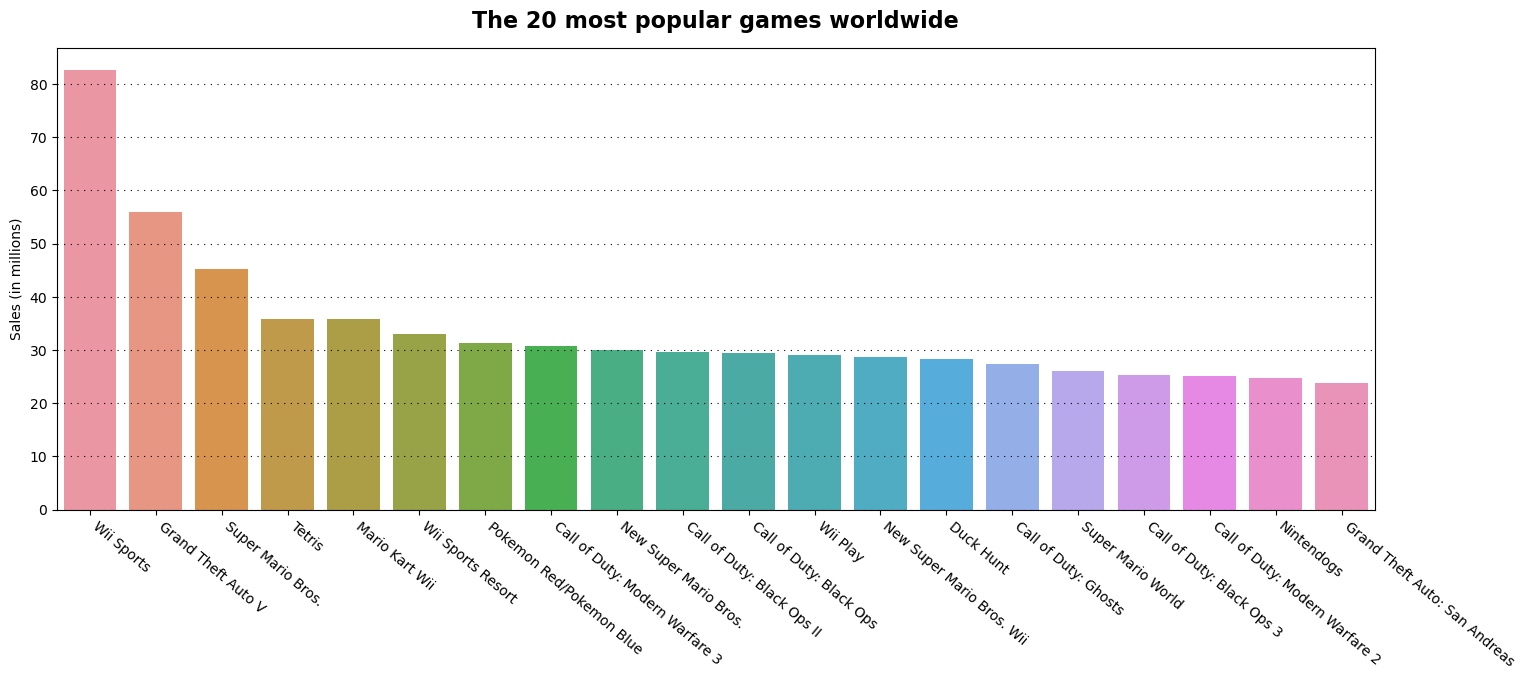

In [25]:
# Group the data by game name and sum the global sales for each game
Global_games = df.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False).head(20)

# Create figure with size 17x6 inches
plt.figure(figsize=(17, 6))

# Create a bar plot of the global game sales data
sns.barplot(data=Global_games, x=Global_games.index, y=Global_games.values, order=Global_games.values)

# Get the current axis and set the x-tick labels and rotation
ax = plt.gca()
ax.set_xticks(range(len(Global_games.index)))
ax.set_xticklabels(Global_games.index, ha='left')
ax.tick_params(axis='x', rotation=320)

# Add a title, x and y labels, and a grid to the plot
plt.title("The 20 most popular games worldwide", y=1.025, fontsize=16, fontweight="bold")
plt.ylabel("Sales (in millions)")
plt.xlabel("")
plt.grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))

# Show the plot
plt.show()

## **Top 10 game sales in each region**

It appears that the most popular games in each region differ from one another. While some games, such as Wii Sports, Grand Theft Auto V, and Mario Kart Wii, appear in the top 10 for all three main regions (NA, EU, and Other regions), Japan's most popular games are distinct from those in the other regions. Notably, five out of Japan's top 10 games are part of the Pokemon franchise.

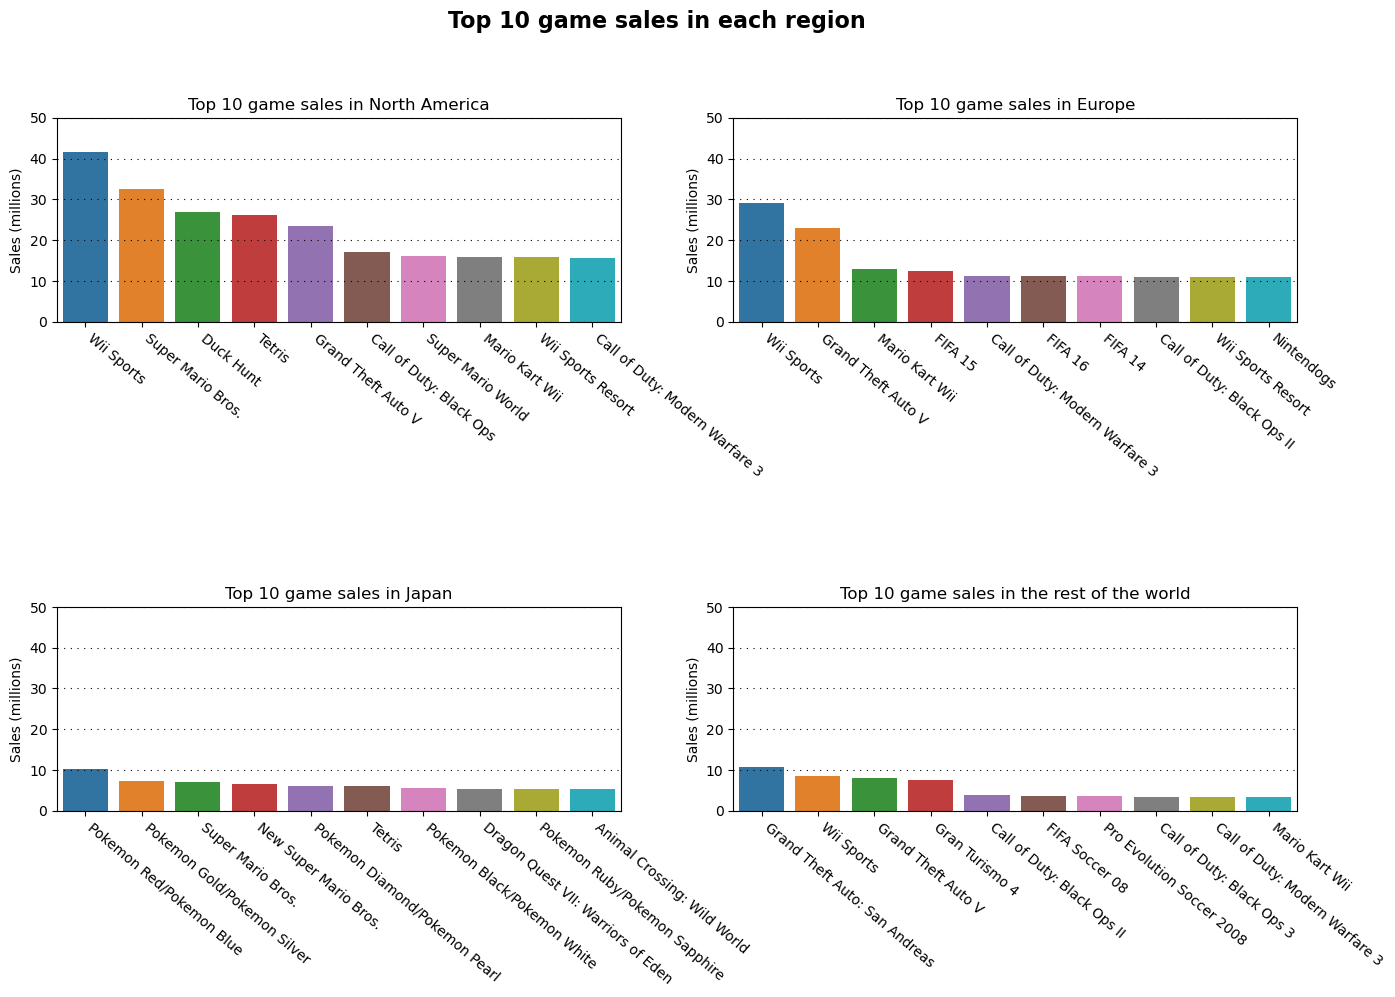

In [26]:
# Top ten games for each region
NA_games = df.groupby("Name")["NA_Sales"].sum().sort_values(ascending=False).head(10)
EU_games = df.groupby("Name")["EU_Sales"].sum().sort_values(ascending=False).head(10)
JP_games = df.groupby("Name")["JP_Sales"].sum().sort_values(ascending=False).head(10)
Other_games = df.groupby("Name")["Other_Sales"].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(2, 2, figsize=(16, 9), gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})

# Create a bar plot for NA sales and customize the subplot
sns.barplot(data=NA_games, x=NA_games.index, y=NA_games.values, ax=axes[0, 0], order=NA_games.values)
axes[0, 0].set_title('Top 10 game sales in North America', loc='center', fontsize = 12)
axes[0, 0].set_xticklabels(NA_games.index, rotation=320, ha="left")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Sales (millions)")
axes[0, 0].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[0, 0].set_ylim([0, 50])

# Create a bar plot for EU sales and customize the subplot
sns.barplot(data=EU_games, x=EU_games.index, y=EU_games.values, ax=axes[0, 1], order=EU_games.values)
axes[0, 1].set_title('Top 10 game sales in Europe', loc='center', fontsize = 12)
axes[0, 1].set_xticklabels(EU_games.index, rotation=320, ha="left")   
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Sales (millions)")
axes[0, 1].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[0, 1].set_ylim([0, 50])

# Create a bar plot for JP sales and customize the subplot
sns.barplot(data=JP_games, x=JP_games.index, y=JP_games.values, ax=axes[1, 0], order=JP_games.values)
axes[1, 0].set_title('Top 10 game sales in Japan', loc='center', fontsize = 12)
axes[1, 0].set_xticklabels(JP_games.index, rotation=320, ha="left") 
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("Sales (millions)")
axes[1, 0].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[1, 0].set_ylim([0, 50])

# Create a bar plot for Other sales and customize the subplot
sns.barplot(data=Other_games, x=Other_games.index, y=Other_games.values, ax=axes[1, 1], order=Other_games.values)
axes[1, 1].set_title('Top 10 game sales in the rest of the world', loc='center', fontsize = 12)
axes[1, 1].set_xticklabels(Other_games.index, rotation=320, ha="left")
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("Sales (millions)")
axes[1, 1].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[1, 1].set_ylim([0, 50])

# Add a common title for the entire figure
fig.suptitle("Top 10 game sales in each region", y=1, fontsize=16, fontweight="bold")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1.4, wspace=0.2)

plt.show()

## **Game genre ranking by sales worldwide**

The action genre has the highest sales, with a significant lead over the second place genre, sports.

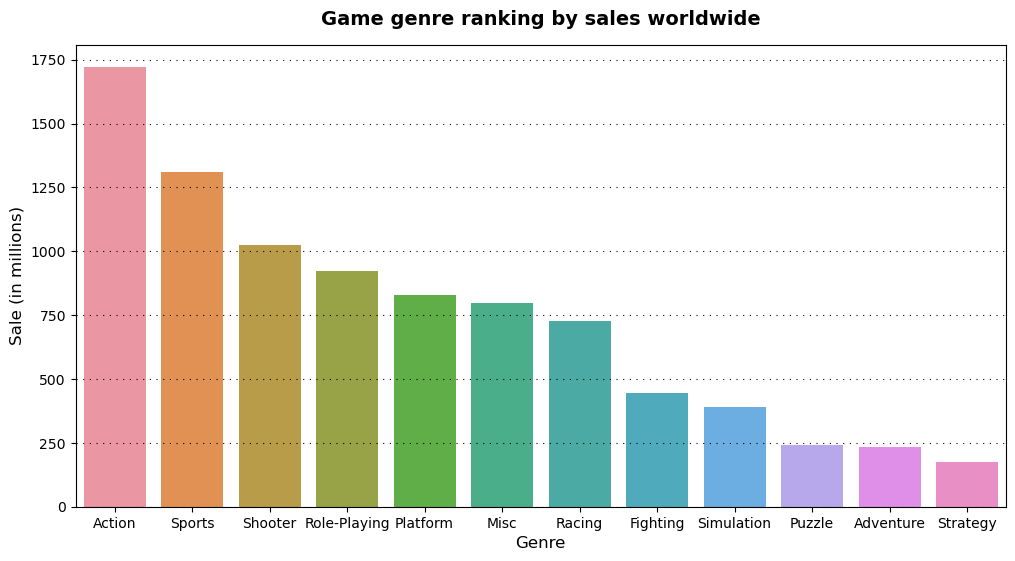

In [27]:
# Calculate global game sales by genre
global_sales_genre = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

# Set plot size
plt.figure(figsize=(12, 6))

# Create bar plot using seaborn
sns.barplot(data=global_sales_genre, x=global_sales_genre.index, y=global_sales_genre.values, order=global_sales_genre.values)

# Set x-tick labels to genre names
plt.xticks(range(len(global_sales_genre)), global_sales_genre.index)

# Set plot title, x and y labels
plt.title("Game genre ranking by sales worldwide", y=1.025, fontsize=14, fontweight="bold")
plt.ylabel("Sale (in millions)", fontsize=12)
plt.xlabel("Genre", fontsize=12)

# Add horizontal grid lines
plt.grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))

# Show plot
plt.show()


## **Top 10 game genres by sales in each region**

The top four most popular genres in NA, EU, and Other regions are the same and in the same order: Action, Sports, Shooter, and Platform. However, in Japan, the role-playing genre is number one in terms of sales, likely due to the popularity of the Pokemon franchise.

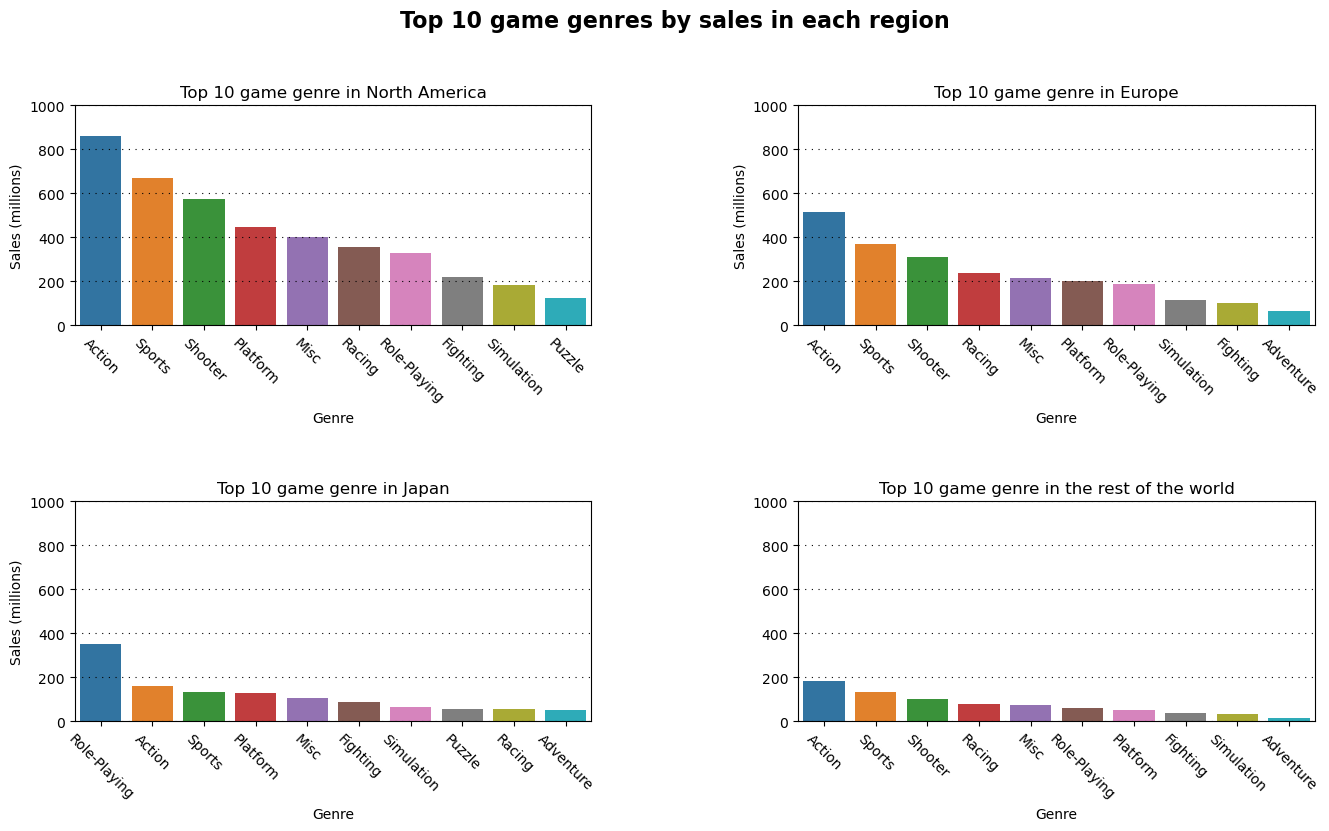

In [28]:
NA_sales = df.groupby("Genre")["NA_Sales"].sum().sort_values(ascending=False).head(10)
EU_sales = df.groupby("Genre")["EU_Sales"].sum().sort_values(ascending=False).head(10)
JP_sales = df.groupby("Genre")["JP_Sales"].sum().sort_values(ascending=False).head(10)
Other_sales = df.groupby("Genre")["Other_Sales"].sum().sort_values(ascending=False).head(10)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})

# Create a bar plot for NA sales and customize the subplot
sns.barplot(x=NA_sales.index, y=NA_sales.values, data=NA_sales, ax=axes[0, 0], order=NA_sales.values)
axes[0, 0].set_title("Top 10 game genre in North America")
axes[0, 0].set_xticklabels(NA_sales.index, rotation=315)
axes[0, 0].set_xlabel("Genre") 
axes[0, 0].set_ylabel("Sales (millions)")
axes[0, 0].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[0, 0].set_ylim([0,1000])

# Create a bar plot for EU sales and customize the subplot
sns.barplot(x=EU_sales.index, y=EU_sales.values, data=EU_sales, ax=axes[0, 1], order=EU_sales.values)
axes[0, 1].set_title("Top 10 game genre in Europe")
axes[0, 1].set_xticklabels(EU_sales.index, rotation=315)
axes[0, 1].set_xlabel("Genre")  
axes[0, 1].set_ylabel("Sales (millions)")  
axes[0, 1].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[0, 1].set_ylim([0,1000])

# Create a bar plot for JP sales and customize the subplot
sns.barplot(x=JP_sales.index, y=JP_sales.values, data=JP_sales, ax=axes[1, 0], order=JP_sales.values)
axes[1, 0].set_title("Top 10 game genre in Japan")
axes[1, 0].set_xticklabels(JP_sales.index, rotation=315)
axes[1, 0].set_xlabel("Genre")  
axes[1, 0].set_ylabel("Sales (millions)")  
axes[1, 0].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[1, 0].set_ylim([0,1000])

# Create a bar plot for Other sales and customize the subplot
sns.barplot(x=Other_sales.index, y=Other_sales.values, data=Other_sales, ax=axes[1, 1], order=Other_sales.values)
axes[1, 1].set_title("Top 10 game genre in the rest of the world")
axes[1, 1].set_xticklabels(Other_sales.index, rotation=315)
axes[1, 1].set_xlabel("Genre")
axes[1, 1].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[1, 1].set_ylim([0,1000])

# Add a common title for the entire figure
fig.suptitle("Top 10 game genres by sales in each region", y=1, fontsize=16, fontweight="bold")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.4)

# Show the plot
plt.show()

## **Top 20 most profitable publishers worldwide**

It's clear that Nintendo is the most successful game publisher worldwide, followed by Electronic Arts, Activision, and Sony Computer Entertainment. 

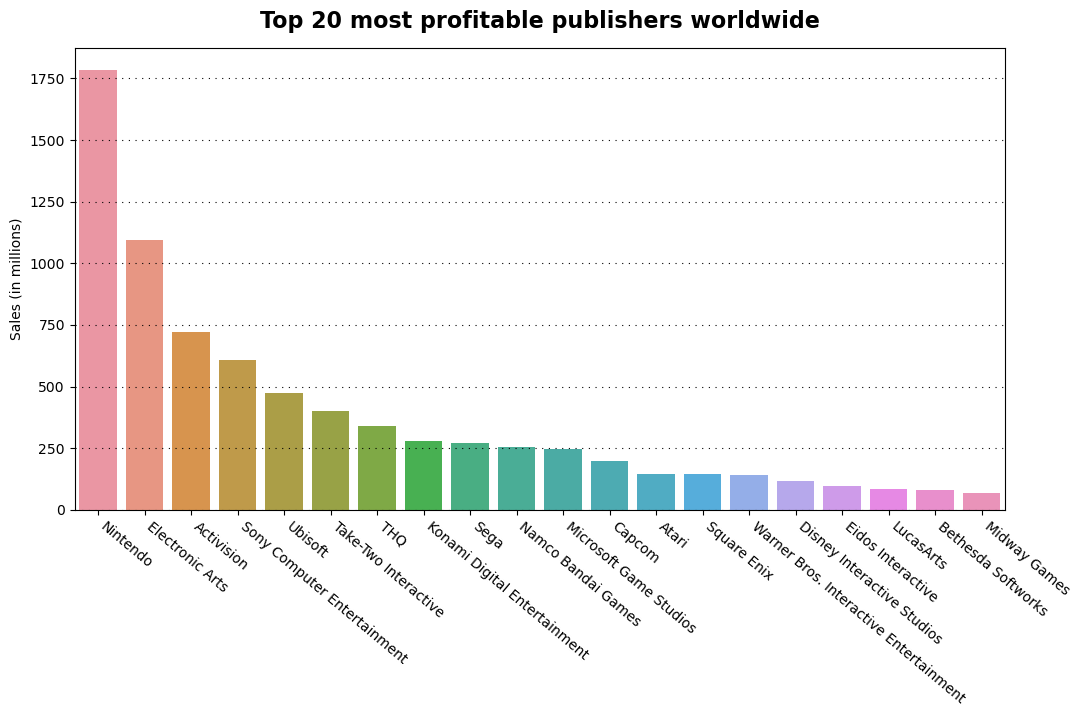

In [29]:
# Calculate the top 10 publishers based on global sales
Overall_publishers = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(20)

# Set plot size
plt.figure(figsize=(12, 6))

# Create a bar plot of the top 10 publishers
sns.barplot(data=Overall_publishers, x=Overall_publishers.index, y=Overall_publishers.values, order=Overall_publishers.values)

# Get the current axis object and set the tick labels and rotation for the x-axis
ax = plt.gca()
ax.set_xticks(range(len(Overall_publishers.index)))
ax.set_xticklabels(Overall_publishers.index, ha='left')
ax.tick_params(axis='x', rotation=320)

# Add a title, label the y-axis, and remove the x-axis label
plt.title("Top 20 most profitable publishers worldwide", y=1.025, fontsize=16, fontweight="bold")
plt.ylabel("Sales (in millions)")
plt.xlabel("")

# Add a grid to the y-axis
plt.grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))

# Display the plot
plt.show()


## **Top 10 most profitable publishers in each region**

Game publishers in North America and Europe share similarities in terms of their success, but Japan has a different set of publishers that dominate the market. However, there are two publishers, Nintendo and Sony Computer Entertainment, that can generate significant profits across all four regions.

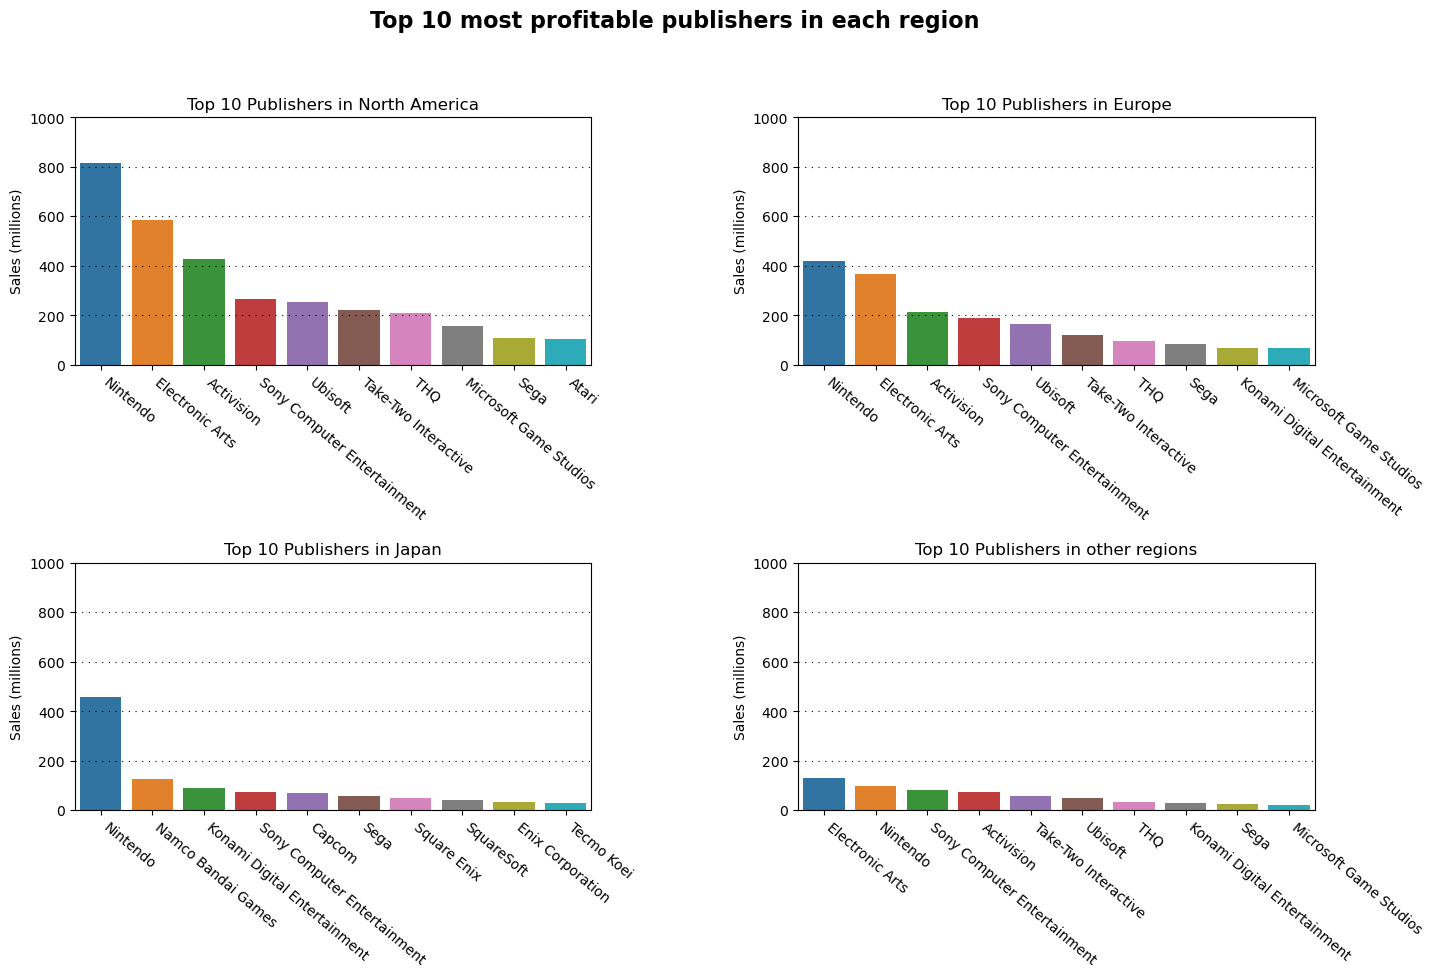

In [30]:
# Top five publisher for each region
import seaborn as sns
NA_publishers = df.groupby("Publisher")["NA_Sales"].sum().sort_values(ascending=False).head(10)
EU_publishers = df.groupby("Publisher")["EU_Sales"].sum().sort_values(ascending=False).head(10)
JP_publishers = df.groupby("Publisher")["JP_Sales"].sum().sort_values(ascending=False).head(10)
Other_publishers = df.groupby("Publisher")["Other_Sales"].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(2, 2, figsize=(16, 9), gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})

# Create a bar plot for NA region and customize the subplot
sns.barplot(data=NA_publishers, x=NA_publishers.index, y=NA_publishers.values, ax=axes[0, 0], order=NA_publishers.values)
axes[0, 0].set_title('Top 10 Publishers in North America', loc='center', fontsize = 12)
axes[0, 0].set_xticklabels(NA_publishers.index, rotation=320, ha="left")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Sales (millions)")
axes[0, 0].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[0, 0].set_ylim([0,1000])

# Create a bar plot for EU region  and customize the subplot
sns.barplot(data=EU_publishers, x=EU_publishers.index, y=EU_publishers.values, ax=axes[0, 1], order=EU_publishers.values)
axes[0, 1].set_title('Top 10 Publishers in Europe', loc='center', fontsize = 12)
axes[0, 1].set_xticklabels(EU_publishers.index, rotation=320, ha="left")   
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Sales (millions)")
axes[0, 1].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[0, 1].set_ylim([0,1000])

# Create a bar plot for JP region and customize the subplot
sns.barplot(data=JP_publishers, x=JP_publishers.index, y=JP_publishers.values, ax=axes[1, 0], order=JP_publishers.values)
axes[1, 0].set_title('Top 10 Publishers in Japan', loc='center', fontsize = 12)
axes[1, 0].set_xticklabels(JP_publishers.index, rotation=320, ha="left") 
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("Sales (millions)")
axes[1, 0].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[1, 0].set_ylim([0,1000])

# Create a bar plot for the rest of the world and customize the subplot
sns.barplot(data=Other_publishers, x=Other_publishers.index, y=Other_publishers.values, ax=axes[1, 1], order=Other_publishers.values)
axes[1, 1].set_title('Top 10 Publishers in other regions', loc='center', fontsize = 12)
axes[1, 1].set_xticklabels(Other_publishers.index, rotation=320, ha="left")
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("Sales (millions)")
axes[1, 1].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[1, 1].set_ylim([0,1000])

# Add a common title for the entire figure
fig.suptitle("Top 10 most profitable publishers in each region", y=1, fontsize=16, fontweight="bold")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.4)

# Show the plot
plt.show()

## **Top 20 most profitable platforms worldwide**

The PlayStation 2 (PS2) is the most profitable platform worldwide, standing out from the rest with impressive sales figures. Trailing behind the PS2 are the Xbox 360 (X360), PlayStation 3 (PS3), Wii, DS, and PlayStation (PS), all of which have a relatively similar amounts of sales. Meanwhile, the other followed platforms have sales of about half of the PS approximately.

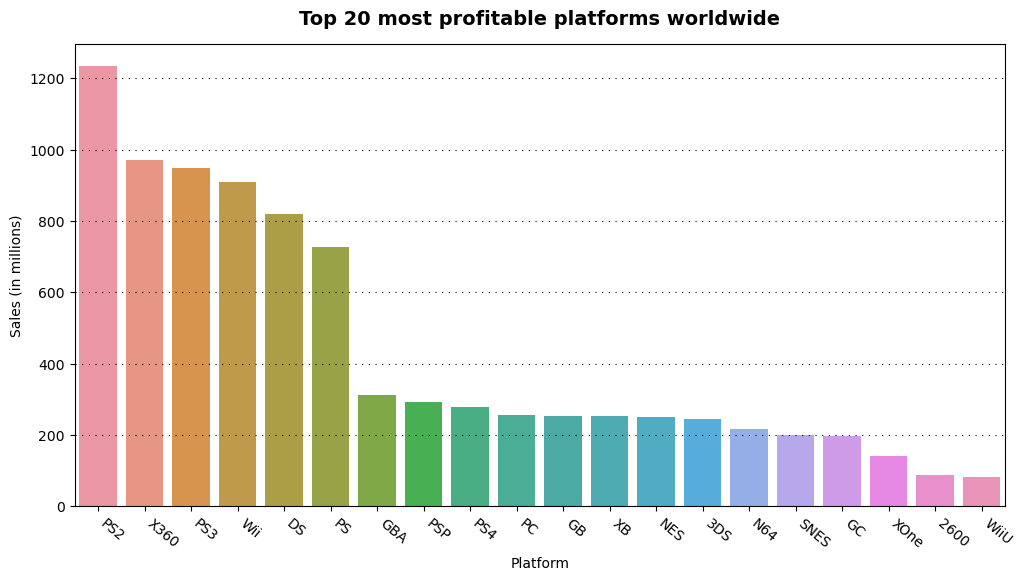

In [31]:
# Group the data by platform and sum the global sales for each platform
platforms_sales_global = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(20)

# Set plot size
plt.figure(figsize=(12, 6))

# Create a bar plot using seaborn
sns.barplot(data=platforms_sales_global, x=platforms_sales_global.index, y=platforms_sales_global.values, order=platforms_sales_global.values)

# Get the current axes and set the x-axis ticks and labels
ax = plt.gca()
ax.set_xticks(range(len(platforms_sales_global.index)))
ax.set_xticklabels(platforms_sales_global.index, ha='left')

# Rotate the x-axis tick labels for better readability
ax.tick_params(axis='x', rotation=320)

# Add a title and labels for the x- and y-axes
plt.title("Top 20 most profitable platforms worldwide", y=1.025, fontsize=14, fontweight="bold")
plt.ylabel("Sales (in millions)")
plt.xlabel("Platform")

# Add a grid to the y-axis using dashed lines
plt.grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))

# Display the plot
plt.show()

## **Top 10 most profitable platforms in each region**

Five gaming platforms have proven to be profitable in all four regions based on their game sales, and they are the DS, PS, PS2, PS3, and Wii.


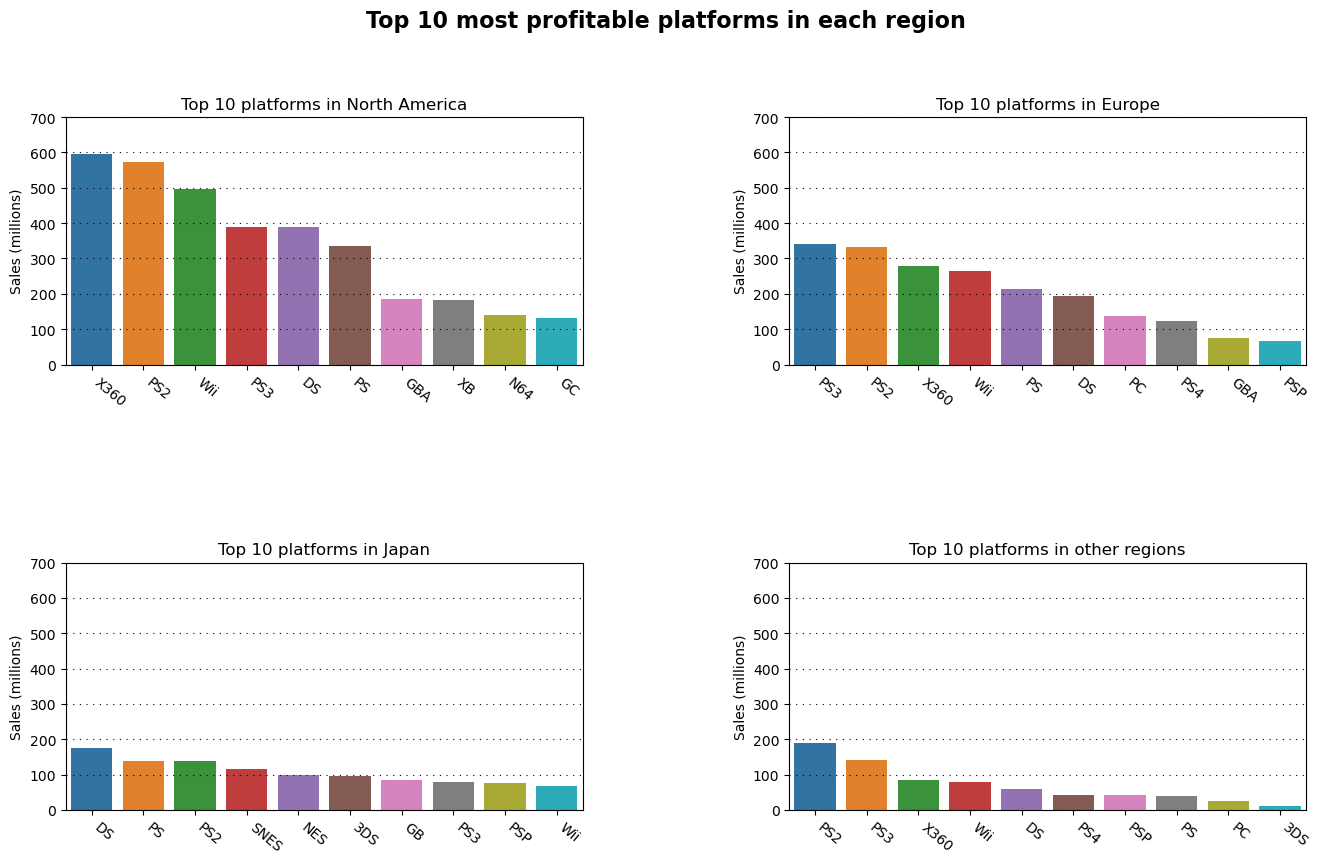

In [32]:
# Top five publisher for each region
import seaborn as sns
NA_platforms = df.groupby("Platform")["NA_Sales"].sum().sort_values(ascending=False).head(10)
EU_platforms = df.groupby("Platform")["EU_Sales"].sum().sort_values(ascending=False).head(10)
JP_platforms = df.groupby("Platform")["JP_Sales"].sum().sort_values(ascending=False).head(10)
Other_platforms = df.groupby("Platform")["Other_Sales"].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(2, 2, figsize=(16, 9), gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})

sns.barplot(data=NA_platforms, x=NA_platforms.index, y=NA_platforms.values, ax=axes[0, 0], order=NA_platforms.values)
axes[0, 0].set_title('Top 10 platforms in North America', loc='center', fontsize = 12)
axes[0, 0].set_xticklabels(NA_platforms.index, rotation=320, ha="left")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Sales (millions)")
axes[0, 0].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[0, 0].set_ylim([0,700])

sns.barplot(data=EU_platforms, x=EU_platforms.index, y=EU_platforms.values, ax=axes[0, 1], order=EU_platforms.values)
axes[0, 1].set_title('Top 10 platforms in Europe', loc='center', fontsize = 12)
axes[0, 1].set_xticklabels(EU_platforms.index, rotation=320, ha="left")   
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Sales (millions)")
axes[0, 1].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[0, 1].set_ylim([0,700])

sns.barplot(data=JP_platforms, x=JP_platforms.index, y=JP_platforms.values, ax=axes[1, 0], order=JP_platforms.values)
axes[1, 0].set_title('Top 10 platforms in Japan', loc='center', fontsize = 12)
axes[1, 0].set_xticklabels(JP_platforms.index, rotation=320, ha="left") 
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("Sales (millions)")
axes[1, 0].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[1, 0].set_ylim([0,700])

sns.barplot(data=Other_platforms, x=Other_platforms.index, y=Other_platforms.values, ax=axes[1, 1], order=Other_platforms.values)
axes[1, 1].set_title('Top 10 platforms in other regions', loc='center', fontsize = 12)
axes[1, 1].set_xticklabels(Other_platforms.index, rotation=320, ha="left")
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("Sales (millions)")
axes[1, 1].grid(color='#000000', linestyle=':', axis='y', dashes=(1,5))
axes[1, 1].set_ylim([0,700])

# Add a common title for the entire figure
fig.suptitle("Top 10 most profitable platforms in each region", y=1, fontsize=16, fontweight="bold")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.4)

# Show the plot
plt.show()

## **Findings**

**Sales trends over time**
- Global video game sales remained below 100 million from 1980 to 1994, but started to increase significantly in 1995, reaching a peak of almost 700 million in 2008. However, sales began to decline after that and were below 100 million by 2016.
- North America had the highest game sales figures, followed by Europe, and then Japan and Other regions, with some overlap between Japan and Other regions from 2004 to 2010.
- Year-over-year game sales growth was volatile from 1981 to 1993, with several years showing growth rates over 50% followed by negative growth. After 2002, sales growth remained more steady at around 15%, but negative growth was observed after 2010, with the most negative growth occurring in 2016.
- Nearly half of all global video game sales (49.2%) are attributed to North America, followed by Europe with 27.3%, Japan with 14.6%, and other regions with 9.0%.

**Sales by genre**
- The action genre has the highest sales worldwide, with a significant lead over the second-place genre, sports.
- The top four most popular genres in North America, Europe, and Other regions are the same and in the same order: action, sports, shooter, and platform.
- In Japan, the role-playing genre is the number one in terms of sales, likely due to the popularity of the Pokemon franchise.
- The top 10 game genres by sales in each region show some regional differences, but overall, the action and sports genres tend to be the most popular in most regions.

**Sales by Publisher**
- Nintendo is the most successful game publisher worldwide, followed by Electronic Arts, Activision, and Sony Computer Entertainment.
- The top 10 most profitable publishers in each region show some regional differences, with North America, Europe, and other regions sharing similarities in terms of their success. Japan has a different set of publishers that dominate the market. However, two publishers, Nintendo and Sony Computer Entertainment, can generate significant profits across all four regions.

**Sales by platform**
- The PlayStation 2 (PS2) is the most profitable platform worldwide, standing out from the rest with impressive sales figures. Trailing behind the PS2 are the Xbox 360 (X360), PlayStation 3 (PS3), Wii, DS, and PlayStation (PS), all of which have a relatively similar amount of sales. Meanwhile, other followed platforms have sales of about half of the PS approximately.
- The top 10 most profitable platforms in each region show some similarities, with five gaming platforms (DS, PS, PS2, PS3, and Wii) proving to be profitable in all four regions based on their game sales.


